# Minor thesis code

ID: 29502861

Name: Bin Wang

Last modified: 5.7.2020

## Required libraries

In [1]:
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.signal import find_peaks
import seaborn as sns
import os
pd.options.display.max_columns = None
pd.options.display.max_rows = None

## Data import

In [2]:
# convert data type
# path = r"Change path"
# files= os.listdir(path)
# save_path = r"Change path"
# for txt in files:
#     temp = pd.read_table(path+"\\"+ txt)
#     temp.to_csv(save_path+"\\"+ txt + '.csv', encoding='utf-8', index = None)
    
# import data for analysis
data = pd.read_table(r"https://raw.githubusercontent.com/nimt0001/Minor-thesis-project/master/GSM1448808_dr_10ss_LR.csv",delimiter = ',') #/content/GSM1448808_dr_10ss_LR.csv https://raw.githubusercontent.com/nimt0001/Minor-thesis-project/master/GSM1448808_dr_10ss_LR.csv
# set index
data.index = data['GENEID'] 
data = data.drop(['GENEID'], axis=1)

# subset gene
# # since genes have little read count from section 45-96, we can delete them all
data = data[data.columns[0:44]]

# divide the data into genes and ercc
ercc = data[data.index.str.contains("ERCC")]
gene = data[data.index.str.contains("ENSD")]

ercc.head() ##print top n rows - HN
#gene.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
GENEID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ERCC-00002,178,169,229,222,198,146,232,148,305,100,1,146,220,145,205,97,205,107,175,140,331,149,358,205,258,190,234,195,219,203,274,164,311,261,289,172,528,29,329,199,280,374,185,279
ERCC-00003,4,9,13,14,14,8,5,4,13,1,1,2,6,7,5,1,13,10,10,6,16,7,6,5,11,5,7,6,14,8,16,5,9,5,10,5,10,7,7,4,11,12,5,7
ERCC-00004,29,44,46,44,47,36,51,26,52,21,0,21,42,30,27,17,47,22,50,19,53,47,63,31,22,31,37,25,56,33,42,23,41,44,42,52,93,15,43,38,58,56,36,38
ERCC-00009,3,7,4,5,1,5,5,1,5,0,0,10,5,7,3,3,8,4,9,1,9,7,6,7,4,4,14,4,5,2,3,2,7,10,10,0,8,1,12,10,5,7,5,12
ERCC-00019,0,1,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0


## Data normalization


In [22]:
# spike-in normalization for each column
spike_sum = ercc.sum(axis=0)+0.1 # to account for reads=0, 0.1 is added before calculating the sum.
spike_data_col = gene.div(spike_sum,axis=1)
mysum = spike_data_col.sum(axis=1)
tc_data_row = spike_data_col.div(mysum, axis=0) 
lpm_list = pd.read_table(r"https://raw.githubusercontent.com/nimt0001/Minor-thesis-project/master/LPM_list.txt",delimiter = ',')
lpm_list = lpm_list['ENSEMBL_ID']
tc_lpm_row = tc_data_row.loc[list(lpm_list)]

##HN - print out
# pd.read_table??
display(tc_lpm_row)
display(list(lpm_list))
display(spike_sum.head())
display(spike_data_col.head())
display(tc_data_row.head())



,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
GENEID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ENSDARG00000019930,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.022983,0.049207,0.070647,0.169743,0.082701,0.020815,0.028580,0.058820,0.037623,0.053171,0.010503,0.009193,0.032729,0.092585,0.070785,0.137230,0.018127,0.015542,0.007338,0.006206,0.005471,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
ENSDARG00000031983,0.000000,0.0,0.0,0.0,0.0,0.0,0.010437,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.018022,0.000000,0.000000,0.024679,0.063001,0.066971,0.154516,0.054004,0.026869,0.041893,0.028705,0.041581,0.040946,0.068026,0.023905,0.123209,0.177616,0.000000,0.000000,0.014526,0.000000,0.008123,0.000000,0.005602,0.000000,0.007367,0.000000,0.000000,0.0,0.0,0.000000
ENSDARG00000054632,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.113924,0.042093,0.100293,0.045691,0.052710,0.026317,0.073327,0.047636,0.039169,0.028369,0.009312,0.053041,0.097856,0.049447,0.156820,0.036722,0.020989,0.000000,0.006286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
ENSDARG00000008305,0.000000,0.0,0.0,0.0,0.0,0.0,0.005727,0.004226,0.004314,0.000000,0.0,0.021884,0.013083,0.039551,0.037442,0.080164,0.037236,0.069132,0.064302,0.025433,0.004233,0.007371,0.013408,0.019687,0.005703,0.014977,0.013330,0.016395,0.003976,0.060190,0.053156,0.130814,0.093644,0.025275,0.026740,0.020758,0.021517,0.039868,0.012126,0.012134,0.002207,0.0,0.0,0.000000
ENSDARG00000020746,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.011532,0.123454,0.062557,0.088721,0.028293,0.026112,0.019556,0.034055,0.023598,0.000000,0.008783,0.000000,0.000000,0.090893,0.061238,0.273668,0.118245,0.000000,0.000000,0.000000,0.000000,0.000000,0.004734,0.024559,0.000000,0.000000,0.000000,0.0,0.0,0.000000
ENSDARG00000013477,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.180047,0.053220,0.064696,0.034386,0.028561,0.023767,0.066221,0.034416,0.053060,0.000000,0.000000,0.011975,0.007364,0.004466,0.263935,0.079592,0.056866,0.008950,0.000000,0.025024,0.000000,0.003452,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
ENSDARG00000021232,0.000000,0.0,0.0,0.0,0.0,0.0,0.003693,0.005451,0.002782,0.000000,0.0,0.033870,0.020248,0.044635,0.096581,0.036926,0.065489,0.104025,0.031594,0.049203,0.005459,0.004753,0.000000,0.000000,0.000000,0.000000,0.010315,0.033832,0.015386,0.081327,0.038088,0.130621,0.017988,0.042378,0.051731,0.035698,0.019823,0.010284,0.007820,0.000000,0.000000,0.0,0.0,0.000000
ENSDARG00000053868,0.000669,0.0,0.0,0.0,0.0,0.0,0.001318,0.000000,0.002482,0.002753,0.0,0.000000,0.000000,0.002276,0.007756,0.043493,0.038958,0.121995,0.087395,0.071224,0.013153,0.048354,0.030861,0.040782,0.008533,0.006033,0.028840,0.071699,0.068646,0.182083,0.029908,0.056335,0.014675,0.011054,0.003077,0.000000,0.001769,0.000000,0.000930,0.001862,0.000508,0.0,0.0,0.000579
ENSDARG00000018004,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.090145,0.076708,0.122312,0.282201,0.000000,0.000000,0.025504,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.228980,0.117963,0.056187,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000


['ENSDARG00000019930',
 'ENSDARG00000031983',
 'ENSDARG00000054632',
 'ENSDARG00000008305',
 'ENSDARG00000020746',
 'ENSDARG00000013477',
 'ENSDARG00000021232',
 'ENSDARG00000053868',
 'ENSDARG00000018004',
 'ENSDARG00000000767',
 'ENSDARG00000038147',
 'ENSDARG00000095019',
 'ENSDARG00000056920',
 'ENSDARG00000089475',
 'ENSDARG00000078004',
 'ENSDARG00000031891',
 'ENSDARG00000039304',
 'ENSDARG00000030125',
 'ENSDARG00000005150']

1     971.1
2     792.1
3    1120.1
4     910.1
5     910.1
dtype: float64

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
GENEID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ENSDARG00000000001,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001501,0.000000,0.000000,0.000678,0.001395,0.00000,0.001326,0.000000,0.000000,0.000704,0.001015,0.000000,0.000000,0.000000,0.000000,0.000789,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.00000
ENSDARG00000000002,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.001751,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000750,0.000000,0.002035,0.000000,0.00303,0.006630,0.001888,0.003484,0.000000,0.002030,0.000000,0.000000,0.000000,0.000000,0.000000,0.001225,0.000544,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.00000
ENSDARG00000000018,0.0,0.0,0.0,0.0,0.0,0.0,0.002028,0.001497,0.000764,0.000000,0.0,0.004650,0.003707,0.001751,0.009283,0.022308,0.013188,0.030606,0.030365,0.060051,0.019489,0.036549,0.068516,0.073909,0.03535,0.041109,0.053819,0.030194,0.017604,0.029439,0.006275,0.004484,0.003528,0.002686,0.003946,0.000000,0.001089,0.002824,0.002863,0.00000,0.001564,0.0,0.0,0.00000
ENSDARG00000000019,0.0,0.0,0.0,0.0,0.0,0.0,0.004056,0.007484,0.005347,0.008473,0.0,0.012401,0.009267,0.022763,0.023870,0.028392,0.026376,0.040808,0.029281,0.039033,0.024736,0.043075,0.052235,0.043230,0.06262,0.058348,0.035880,0.047614,0.022534,0.077150,0.029286,0.037364,0.021876,0.029541,0.014206,0.028183,0.014697,0.025417,0.017178,0.01146,0.003127,0.0,0.0,0.00089
ENSDARG00000000068,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000927,0.005253,0.006630,0.008112,0.010790,0.016323,0.019521,0.024020,0.017990,0.020885,0.022387,0.030679,0.02020,0.010609,0.015107,0.020903,0.011971,0.025378,0.001046,0.010462,0.012702,0.004476,0.000000,0.000000,0.002722,0.000000,0.001432,0.00000,0.001564,0.0,0.0,0.00000


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
GENEID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ENSDARG00000000001,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.202636,0.000000,0.000000,0.091565,0.188224,0.000000,0.178989,0.000000,0.000000,0.095046,0.137017,0.000000,0.000000,0.000000,0.000000,0.106523,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000
ENSDARG00000000002,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.074931,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032076,0.000000,0.087090,0.000000,0.129662,0.283735,0.080810,0.149087,0.000000,0.086880,0.000000,0.000000,0.000000,0.000000,0.000000,0.052436,0.023294,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000
ENSDARG00000000018,0.0,0.0,0.0,0.0,0.0,0.0,0.003296,0.002432,0.001241,0.000000,0.0,0.007556,0.006023,0.002845,0.015083,0.036247,0.021429,0.049731,0.049340,0.097575,0.031667,0.059387,0.111330,0.120092,0.057439,0.066796,0.087449,0.049061,0.028605,0.047834,0.010197,0.007285,0.005733,0.004364,0.006412,0.000000,0.001769,0.004589,0.004652,0.00000,0.002541,0.0,0.0,0.000000
ENSDARG00000000019,0.0,0.0,0.0,0.0,0.0,0.0,0.004233,0.007810,0.005580,0.008842,0.0,0.012942,0.009671,0.023756,0.024911,0.029631,0.027527,0.042588,0.030559,0.040736,0.025815,0.044955,0.054514,0.045116,0.065352,0.060893,0.037445,0.049691,0.023517,0.080516,0.030563,0.038994,0.022830,0.030830,0.014825,0.029412,0.015338,0.026525,0.017928,0.01196,0.003264,0.0,0.0,0.000929
ENSDARG00000000068,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.002877,0.016309,0.020586,0.025186,0.033500,0.050679,0.060607,0.074577,0.055853,0.064843,0.069505,0.095251,0.062716,0.032937,0.046904,0.064900,0.037167,0.078793,0.003247,0.032481,0.039436,0.013896,0.000000,0.000000,0.008450,0.000000,0.004445,0.00000,0.004855,0.0,0.0,0.000000


## EDA of LPM marker genes (Visualization)

### Overall expression level across sections



In [29]:
# read data
lpm_data = tc_lpm_row
#lpm_data.index = lpm_data['GENEID']
#lpm_data = lpm_data.drop(['GENEID'], axis=1)

# lpm_data = pd.read_table(r"/content/zf10ss.matrix.csv",delimiter = ',')  #tc_lpm_row.csv  zf10ss.matrix.csv
# lpm_data.index = lpm_data['ENSEMBL']
# lpm_data = lpm_data.drop(['ENSEMBL',"gene","name"], axis=1)

## HN
display(lpm_data.shape)
#lpm_data.shape
#lpm_data.head()

(19, 44)

Text(0, 0.5, 'Total reads')

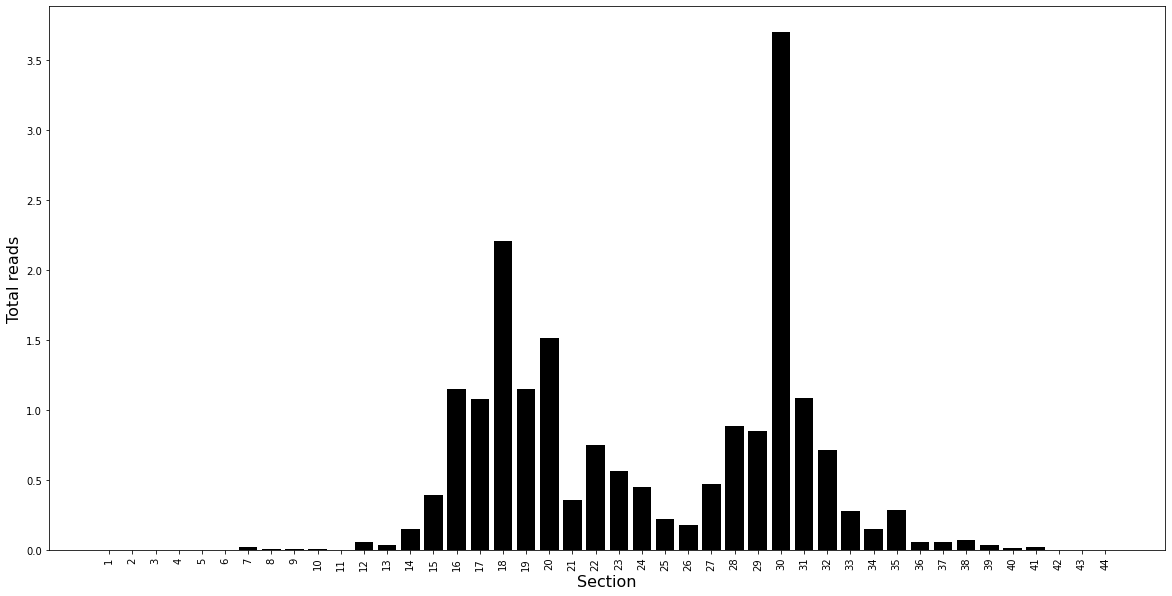

In [30]:
# total read counts across sections
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.bar(lpm_data.columns,lpm_data.sum(),color='black')
plt.xlabel('Section',fontsize=16)
plt.ylabel('Total reads',fontsize=16)
# plt.title('Total reads of LPM marker genes',fontsize=20)

Text(0, 0.5, 'Expression level')

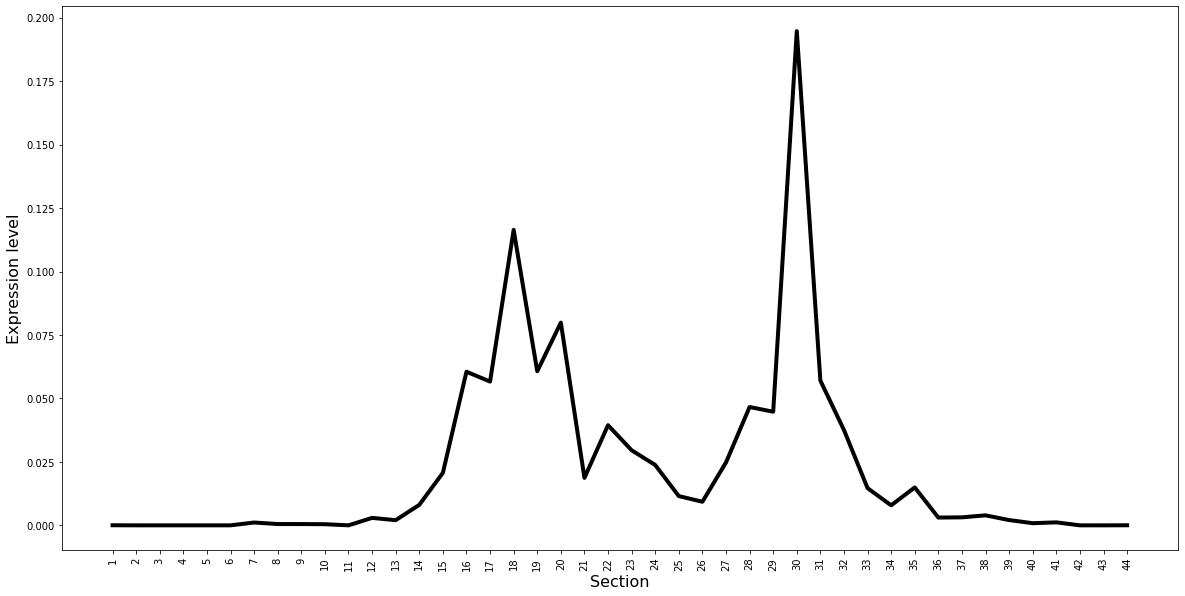

In [31]:
# Analyze expression level for each section
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.plot(lpm_data.columns,lpm_data.mean(),color='black',linewidth=4.0) # change mean to median if needed
plt.xlabel('Section',fontsize=16)
plt.ylabel('Expression level',fontsize=16)
# plt.title('Average expression level of LPM marker genes',fontsize=20)

Text(0, 0.5, 'Expression level')

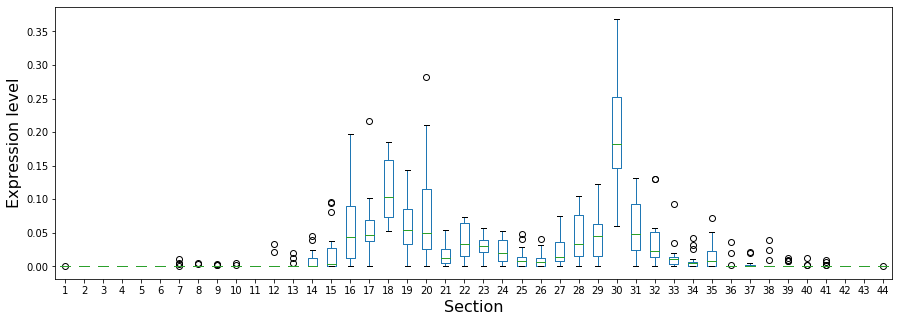

In [32]:
# variability of expression level
lpm_data.boxplot(figsize=(15,5),grid = False)
plt.xlabel('Section',fontsize=16)
plt.ylabel('Expression level',fontsize=16)
# plt.title('Variability expression level of LPM marker genes',fontsize=20)

### Expression level of particular genes

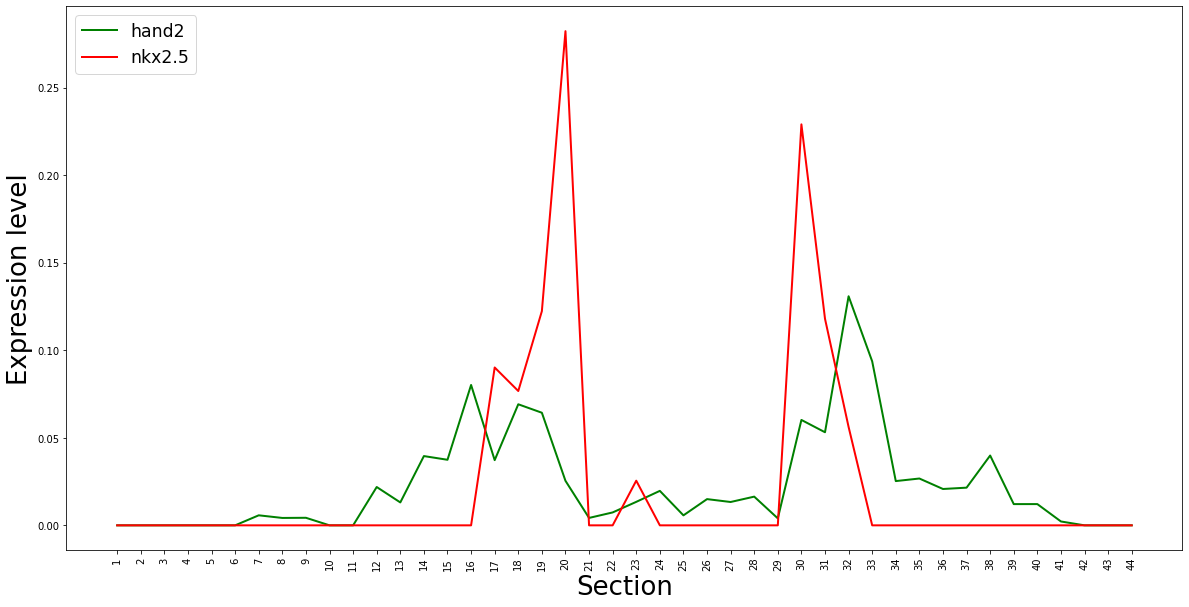

In [35]:
## for example hand2 nkx2.5
plt.figure(figsize=(20,10))
gene_list = lpm_data.loc[['ENSDARG00000008305','ENSDARG00000018004'],:] #change gene id
gene_list.index = ['hand2','nkx2.5']
plt.xticks(rotation=90)
plt.plot(gene_list.columns,gene_list.loc['hand2'],color = 'green',linewidth = 2,label="hand2")
plt.plot(gene_list.columns,gene_list.loc['nkx2.5'],color = 'red',linewidth = 2,label="nkx2.5")
plt.xlabel('Section',fontsize=26)
plt.ylabel('Expression level',fontsize=26)
plt.legend(loc="upper left",fontsize='xx-large')

## Expression patterns analysis

In [36]:
# lpm_data = pd.read_table(r"F:\s4\research\data\normalization\tc_lpm_row.csv",delimiter = ',')
# lpm_data.index = lpm_data['GENEID']
# lpm_data = lpm_data.drop(['GENEID'], axis=1)
# lpm_data.index = lpm_data['GENEID']
# lpm_data = lpm_data.drop(['GENEID'], axis=1)

In [38]:
# change gene's real expression level into discrete values
peak_df = pd.DataFrame(columns=range(1,45))
peak_df['gene_id'] = lpm_data.index
peak_df.index = peak_df['gene_id']
peak_df = peak_df.drop(['gene_id'], axis=1)
for gene_id in lpm_data.index:
    temp = []
    peak = [0]*44
    list_gene = lpm_data.loc[[gene_id],:].values.flatten()
    ## store peaks location
    peaks, _ = find_peaks(list_gene)
    for value in list_gene:
        if value >0:
            temp.append(value)
    ## calculate quartile of expression ratio
    max_value = np.amax(temp)
    compare_max = temp/max_value
    q_75 = np.quantile(compare_max,0.75)
    q_25 = np.quantile(compare_max,0.50)
    IQR = q_75 - q_25
    ## save final threshold
    threshold = 1.5 * IQR + q_75
    ## filtering genes
    for value_index in range(len(list_gene)):
        if list_gene[value_index] / max_value >= q_75:
            peak[value_index] = 1
    for item in peaks:
        if list_gene[item] / max_value >= q_75:
            peak[item] = 2
    peak_df.loc[gene_id] = peak

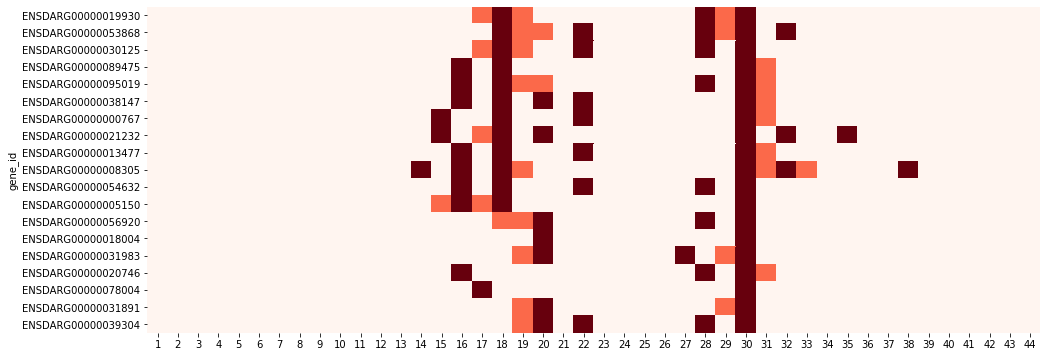

In [39]:
peak_df = peak_df.apply(pd.to_numeric)
peak_df_sort =peak_df.sort_values(by=[18],ascending=False)
plt.figure(figsize=(16, 6))
p1 = sns.heatmap(peak_df_sort,cmap="Reds",cbar=False)


### Dividing sections into expression sub-zones and calculate relative expression ratio

In [40]:
gene_index = []
s1_s2_list = []
s3_s2_list = []
s3_s4_list = []
s5_s4_list = []

for gene_id in lpm_data.index:
## segment gene's expression data into 5 sub-sections
    list_gene = lpm_data.loc[[gene_id],:].values.flatten()
    gene_sec1 = list_gene[0:15]
    gene_sec2 = list_gene[15:20]
    gene_sec3 = list_gene[20:29]
    gene_sec4 = list_gene[29]
    gene_sec5 = list_gene[30:45]

## save the highest value for each section    
    max_sec1 = np.amax(gene_sec1)
    max_sec2 = np.amax(gene_sec2)
    max_sec3 = np.amax(gene_sec3)
    max_sec4 = np.amax(gene_sec4)
    max_sec5 = np.amax(gene_sec5)  
    
## calculate the threshold
    s1_s2 = max_sec1/max_sec2
    s3_s2 = max_sec3/max_sec2
    s3_s4 = max_sec3/max_sec4
    s5_s4 = max_sec5/max_sec4

    s1_s2_list.append(abs(s1_s2))
    s3_s2_list.append(abs(s3_s2))
    s3_s4_list.append(abs(s3_s4))
    s5_s4_list.append(abs(s5_s4))

## calculate quantile
q3_s5_s4 = np.quantile(s5_s4_list,0.75)
q3_s3_s4 = np.quantile(s3_s4_list,0.75)
q3_s3_s2 = np.quantile(s3_s2_list,0.75)
q3_s1_s2 = np.quantile(s1_s2_list,0.75)

q1_s5_s4 = np.quantile(s5_s4_list,0.25)
q1_s3_s4 = np.quantile(s3_s4_list,0.25)
q1_s3_s2 = np.quantile(s3_s2_list,0.25)
q1_s1_s2 = np.quantile(s1_s2_list,0.25)

IQR_s5_s4 = q3_s5_s4 - q1_s5_s4
IQR_s3_s4 = q3_s3_s4 - q1_s3_s4
IQR_s3_s2 = q3_s3_s2 - q1_s3_s2
IQR_s1_s2 = q3_s1_s2 - q1_s1_s2

# expression ratio in neighbouring zones
threshold_s5_s4 = 1.5 * IQR_s5_s4 + q3_s5_s4
threshold_s3_s4 = 1.5 * IQR_s3_s4 + q3_s3_s4
threshold_s3_s2 = 1.5 * IQR_s3_s2 + q3_s3_s4
threshold_s1_s2 = 1.5 * IQR_s1_s2 + q3_s1_s2

In [41]:
# find threshold
print('Z1/Z2: ' + str(round(threshold_s1_s2,2)) +" Z3/Z2: " + str(round(threshold_s3_s2,2)) +" Z4/Z3: " + str(round(threshold_s3_s4,2)) + " Z4/Z5: " + str(round(threshold_s5_s4,2)))

Z1/Z2: 0.42 Z3/Z2: 0.91 Z4/Z3: 0.86 Z4/Z5: 0.96


### Remove genes with no peak expression in LPM zones

In [45]:
# whole tomo-seq data
all_data = tc_data_row
#all_data = pd.read_csv(r"change path")
# all_data=all_data[all_data['GENEID'].str.contains("ENSDARG")]
# all_data.index = all_data['GENEID']
# all_data = all_data.drop(['GENEID'], axis=1)

In [46]:
# remove no peak genes
left_Data = all_data.loc[:, ['15','16','17','18','19','20','21']]
right_data = all_data.loc[:, ['29','30','31']]
remove_index = []
for gene_id in right_data.index:
    left = left_Data.loc[[gene_id],:].values.flatten()
    right = right_data.loc[[gene_id],:].values.flatten()
    if (len(find_peaks(left)[0])==0 )or (len(find_peaks(right)[0])==0):
        remove_index.append(gene_id)
gene_peak = all_data.drop(remove_index,axis=0)


### Distance matrix and contour based model


In [47]:
# SEMLG-average expression
average_lpm = lpm_data.mean()

In [48]:
result = pd.DataFrame()
for gene_id in gene_peak.index:
    query_gene = average_lpm
    gene =gene_peak.loc[[gene_id],:].values.flatten()
    
    #pearson 
    pearson = stats.pearsonr(query_gene , gene)
    result.loc[gene_id, "pearson"] = pearson[0]
    result.loc[gene_id, "pearson_pvalue"] = pearson[1]
    
    #spearman
    spearman = stats.spearmanr(query_gene , gene)
    result.loc[gene_id, "spearman"] = spearman[0]
    result.loc[gene_id, "spearman_pvalue"] = spearman[1]
    
    #euclidean distance
    euclidean_dir = euclidean_distances(np.array(query_gene).reshape(1, -1) , np.array(gene).reshape(1, -1))
    result.loc[gene_id, "euclidean_dir"] = euclidean_dir[0][0]
    
    #Consistency index of the slope 
    slope_increase=0
    slope_stable=0
    slpoe_decrease=0
    
    for section_num in range(1,len(query_gene)):
        slope_query = query_gene[section_num]-query_gene[section_num-1]
        slope_gene = gene[section_num]-gene[section_num-1]
        
        if slope_query >0 and slope_gene >0:
                slope_increase += 1
        elif slope_query==0 and slope_gene==0:
                slope_stable += 1
        elif slope_query<0 and slope_gene <0:
                slpoe_decrease+= 1
        sum_slope = slope_increase+slope_stable+slpoe_decrease
        
        concordence = (sum_slope)/len(query_gene)
        result.loc[gene_id, "concordence"] = concordence
        
    #Concordance of the maximum value 
    
    max_query = np.amax(query_gene)
    max_index_query = np.where(query_gene == max_query)[0][0]

    max_gene = np.amax(gene)
    max_index_gene = np.where(gene == max_gene)[0][0]

    if max_index_query == max_index_gene:
        m = 1
    else:
        m = 0
    result.loc[gene_id, "match"] = m
    
    #adjusted spearman and pearson
    R_star = (pearson[0] +1) /2
    S_star = (spearman[0] +1) /2
    
    ## comprehensive index
    ## weight
    a = 0.3
    b = 0.5
    c = 0.2
    
    JP = a*R_star + b*concordence + c*m
    HR = a*S_star + b*concordence + c*m
    result.loc[gene_id, "JP"] = JP
    result.loc[gene_id, "HR"] = HR

In [49]:
result.head(5)

,pearson,pearson_pvalue,spearman,spearman_pvalue,euclidean_dir,concordence,match,JP,HR
ENSDARG00000000001,0.390215,8.829302e-03,0.401145,6.961732e-03,0.351316,0.272727,0.0,0.344896,0.346535
ENSDARG00000000018,0.458800,1.734094e-03,0.871446,1.415636e-14,0.240464,0.772727,0.0,0.605184,0.667081
ENSDARG00000000019,0.671941,5.912167e-07,0.874646,8.612620e-15,0.183517,0.704545,1.0,0.803064,0.833470
ENSDARG00000000068,0.638488,3.112470e-06,0.838460,1.223447e-12,0.190521,0.545455,0.0,0.518500,0.548496
ENSDARG00000000069,0.511303,3.897010e-04,0.843932,6.277269e-13,0.211112,0.568182,0.0,0.510786,0.560681


### adaptive two-peak based model

In [50]:
# remove genes with high expression in section 1,3,5
## step 1 filter genes base on thresholds
gene_index = []
remove_gene_index = []
for gene_id in gene_peak.index:

    list_gene = gene_peak.loc[[gene_id],:].values.flatten()
    gene_sec1 = list_gene[0:15]
    gene_sec2 = list_gene[15:20]
    gene_sec3 = list_gene[20:28]
    gene_sec4 = list_gene[28:30]
    gene_sec5 = list_gene[30:45]
    
    
    max_sec1 = np.amax(gene_sec1)
    max_sec2 = np.amax(gene_sec2)
    max_sec3 = np.amax(gene_sec3)
    max_sec4 = np.amax(gene_sec4)
    max_sec5 = np.amax(gene_sec5)
    
    if (max_sec1 < threshold_s1_s2*max_sec2) and (max_sec3 < threshold_s3_s2*max_sec2 )and (max_sec3 < threshold_s3_s4*max_sec4) and (max_sec5 < threshold_s5_s4*max_sec4) :
        gene_index.append(gene_id)
    else:
        remove_gene_index.append(gene_id)
        
threshold_data = gene_peak.loc[gene_index]

## step 2 build adaptived model
def define_linear(x,y):
    slope = y/x
    return slope

adaptive_df = threshold_data
sec1 = []
sec2 = []
sec3 = []
sec4 = []
sec5 = []
dis_all = []
clusters = []
for gene_id in threshold_data.index:
    remove_gene_index = []
    list_gene = threshold_data.loc[[gene_id],:].values.flatten()
    #1 sec1-15
    eg_sec1 = np.asarray([0]*15).reshape(1, -1)
    gene_sec1 = list_gene[0:15].reshape(1, -1)
    eu_1 = euclidean_distances(gene_sec1,eg_sec1)[0][0]
    
    #2 sec16-20(in order to calculate peak, expand section from 15 to 21)
    gene_sec2 = list_gene[14:21]
    compare_gene_sec2 = np.asarray(list_gene[15:20]).reshape(1, -1)
    peaks_index_sec2 = find_peaks(gene_sec2)[0]
    
    if len(peaks_index_sec2) == 1:
        compare_eg_sec2 = [0]*5
        compare_eg_sec2[peaks_index_sec2[0]-1] = gene_sec2[peaks_index_sec2][0]
        compare_eg_sec2 = np.asarray(compare_eg_sec2).reshape(1, -1)
        cluster = peaks_index_sec2[0]

    elif len(peaks_index_sec2) > 1:
        peaks_values_sec2 = []
        for i in peaks_index_sec2:
            peaks_values_sec2.append(gene_sec2[i])
        highest_value_sec2 = max(peaks_values_sec2)
        highest_index_sec2 = list(gene_sec2).index(highest_value_sec2)
        cluster = highest_index_sec2


        if highest_index_sec2 == 1: 
            sec_16 = highest_index_sec2
            sec_17 = define_linear(4,highest_value_sec2)*4
            sec_18 = define_linear(4,highest_value_sec2)*3
            sec_19 = define_linear(4,highest_value_sec2)*2
            sec_20 = define_linear(4,highest_value_sec2)*1
        elif highest_index_sec2 == 2:
            sec_16 = define_linear(2,highest_value_sec2)*1
            sec_17 = highest_value_sec2
            sec_18 = define_linear(3,highest_value_sec2)*3
            sec_19 = define_linear(3,highest_value_sec2)*2
            sec_20 = define_linear(3,highest_value_sec2)*1
        elif highest_index_sec2 == 3:
            sec_16 = define_linear(3,highest_value_sec2)*1
            sec_17 = define_linear(3,highest_value_sec2)*2
            sec_18 = highest_value_sec2
            sec_19 = define_linear(3,highest_value_sec2)*2
            sec_20 = define_linear(3,highest_value_sec2)*1
        elif highest_index_sec2 ==4:
            sec_16 = define_linear(4,highest_value_sec2)*1
            sec_17 = define_linear(4,highest_value_sec2)*2
            sec_18 = define_linear(4,highest_value_sec2)*3
            sec_19 = highest_value_sec2
            sec_20 = define_linear(2,highest_value_sec2)*1
        elif highest_index_sec2 ==5:
            sec_16 = define_linear(5,highest_value_sec2)*1
            sec_17 = define_linear(5,highest_value_sec2)*2
            sec_18 = define_linear(5,highest_value_sec2)*3
            sec_19 = define_linear(5,highest_value_sec2)*4
            sec_20 = highest_value_sec2
        else:
            print(gene_id)
            print(highest_index_sec2)
            print(peaks_index_sec2)
            print(highest_value_sec2)

        compare_eg_sec2 = [sec_16,sec_17,sec_18,sec_19,sec_20]
        compare_eg_sec2 = np.asarray(compare_eg_sec2).reshape(1, -1)
    
    eu_2 = euclidean_distances(compare_gene_sec2,compare_eg_sec2)[0][0]

    # 3 sec21-28
    eg_sec3 = np.asarray([0]*8).reshape(1, -1)
    gene_sec3 = list_gene[20:28].reshape(1, -1)
    eu_3 = euclidean_distances(eg_sec3,gene_sec3)[0][0]

    # 4 only one slim peak sec30
    
    gene_sec4 = list_gene[28:31]
    compare_gene_sec4 = np.asarray(list_gene[28:31]).reshape(1, -1)
    peaks_index_sec4 = find_peaks(gene_sec4)[0]

    highest_value_sec4 = gene_sec4[peaks_index_sec4][0]
    compare_example_sec4 = [0]*3
    compare_example_sec4[1] = highest_value_sec4
    compare_example_sec4 = np.asarray(compare_example_sec4).reshape(1, -1)
    eu_4 = euclidean_distances(compare_example_sec4,compare_gene_sec4)[0][0]
    
    # 5
    eg_sec5 = np.asarray([0]*14).reshape(1, -1)
    gene_sec5 = list_gene[30:44].reshape(1, -1)
    eu_5 = euclidean_distances(eg_sec5,gene_sec5)[0][0]
    
    ## overall socres
    eu_all = 0.3*eu_1 + 0.05 * eu_2 + 0.3 *eu_3 + 0.05 * eu_4 + 0.3 * eu_5
    sec1.append(eu_1)
    sec2.append(eu_2)
    sec3.append(eu_3)
    sec4.append(eu_4)
    sec5.append(eu_5)
    dis_all.append(eu_all) 
    clusters.append(cluster)
    
adaptive_df['dis_all'] = dis_all
adaptive_df['sec1'] = sec1
adaptive_df['sec2'] = sec2
adaptive_df['sec3'] = sec3
adaptive_df['sec4'] = sec4
adaptive_df['sec5'] = sec5
adaptive_df['clusters'] = clusters

In [51]:
adaptive_df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,dis_all,sec1,sec2,sec3,sec4,sec5,clusters
GENEID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ENSDARG00000001969,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.155079,0.082425,0.057052,0.028485,0.049605,0.103119,0.052994,0.038382,0.050394,0.035881,0.044132,0.026760,0.154307,0.039747,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027201,0.054436,0.000000,0.0,0.0,0.0,0.075652,0.000000,0.100244,0.154796,0.047916,0.072684,3
ENSDARG00000002909,0.0,0.0,0.0,0.0,0.0,0.0,0.019233,0.009463,0.028976,0.0,0.0,0.0098,0.000000,0.011070,0.025151,0.038463,0.037897,0.103195,0.006856,0.028473,0.028433,0.057765,0.064331,0.008816,0.044697,0.008384,0.041785,0.080760,0.053422,0.102682,0.026449,0.028346,0.026767,0.016978,0.019957,0.007747,0.006883,0.000000,0.022625,0.000000,0.034598,0.0,0.0,0.0,0.082009,0.046370,0.069592,0.136739,0.059611,0.068720,3
ENSDARG00000003250,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.501247,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.498753,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3
ENSDARG00000003822,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0000,0.000000,0.000000,0.000000,0.047355,0.083985,0.000000,0.050647,0.105167,0.017503,0.060960,0.095044,0.065125,0.070752,0.000000,0.066143,0.054235,0.032886,0.142223,0.024423,0.000000,0.000000,0.000000,0.018428,0.028613,0.000000,0.000000,0.000000,0.000000,0.036511,0.0,0.0,0.0,0.074695,0.000000,0.086908,0.172102,0.040963,0.055568,5
ENSDARG00000003971,0.0,0.0,0.0,0.0,0.0,0.0,0.013885,0.020494,0.010459,0.0,0.0,0.0000,0.006344,0.011988,0.027236,0.055536,0.008208,0.125720,0.096519,0.041112,0.000000,0.000000,0.060376,0.019094,0.006915,0.018157,0.019392,0.039752,0.019284,0.076447,0.014321,0.051159,0.019324,0.018386,0.064836,0.025167,0.007453,0.038668,0.058803,0.019614,0.005352,0.0,0.0,0.0,0.076400,0.040595,0.077872,0.079647,0.024020,0.117443,3
